In [18]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

In [3]:
#read train and test files
train_file = pd.read_csv('train.csv')
test_file = pd.read_csv('test.csv')

In [4]:
#view first 5 records of train_file
train_file.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#view first 5 records of test_file
test_file.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#list of all digits that are going to be predicted
np.sort(train_file.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [7]:
#define the number of samples for training set and for validation set
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)

In [8]:
num_train,num_validation

(33600, 8400)

In [9]:
#generate training data from train_file
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [10]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


# Visualize Training Data

Label: 4


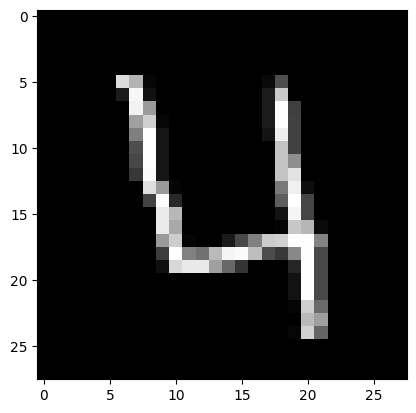

In [12]:
index=3
print("Label: " + str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
plt.show()

In [13]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)

In [15]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.9653571428571428


Validation Confusion Matrix: 
[[839   0   1   0   0   0   6   0   6   0]
 [  0 938   3   2   2   1   0   1   3   0]
 [  7   0 771   4   3   1   2   4   7   2]
 [  3   1  16 835   1   9   2   4   6   5]
 [  0   2   1   0 785   0   6   0   4  13]
 [  1   1   2  12   1 714   4   1   6   5]
 [  3   3   0   0   3   4 818   0   0   0]
 [  0   3   7   1   1   0   0 858   4  10]
 [  1  12   2   4   3   4   4   1 765   6]
 [  6   4   4  12  10   1   0  10   7 786]]
Class 0: Precision: 0.9756, Recall: 0.9847, F1-Score: 0.9801, Support: 852
Class 1: Precision: 0.9730, Recall: 0.9874, F1-Score: 0.9801, Support: 950
Class 2: Precision: 0.9554, Recall: 0.9625, F1-Score: 0.9590, Support: 801
Class 3: Precision: 0.9598, Recall: 0.9467, F1-Score: 0.9532, Support: 882
Class 4: Precision: 0.9703, Recall: 0.9679, F1-Score: 0.9691, Support: 811
Class 5: Precision: 0.9728, Recall: 0.9558, F1-Score: 0.9642, Support: 747
Class 6: Precision: 0.9715, Recall: 0.9844, F1-Score: 0.9779, Support: 831
Class 7: Preci

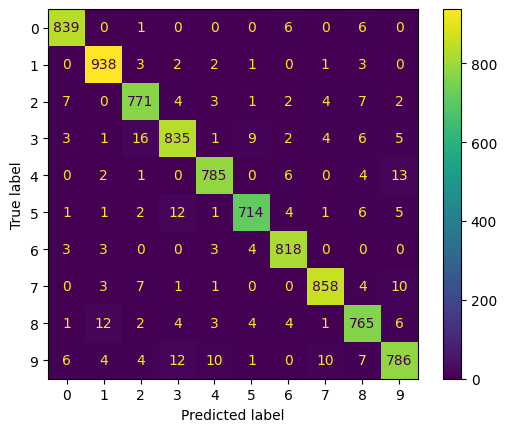

In [21]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

cm = confusion_matrix(y_validation, prediction_validation, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

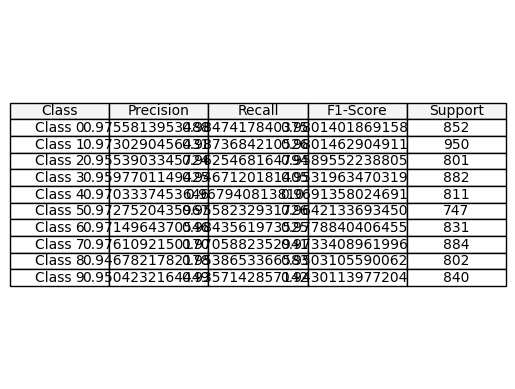

In [22]:
# Calculate precision, recall, f1-score, and support for each class in the validation set
precision, recall, f1_score, support = precision_recall_fscore_support(y_validation, prediction_validation, average=None)

# Create a table
fig, ax = plt.subplots()
ax.axis('off')  # Turn off axis for better visualization of the table

# Data for the table
table_data = []
for class_label in range(10):
    table_data.append([f'Class {class_label}', precision[class_label], recall[class_label], f1_score[class_label], support[class_label]])

# Column labels
col_labels = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']

# Create the table
table = ax.table(cellText=table_data, colLabels=col_labels, loc='center', cellLoc='center', colColours=['#f5f5f5']*5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

# View wrong predictions

Predicted 3 as 7


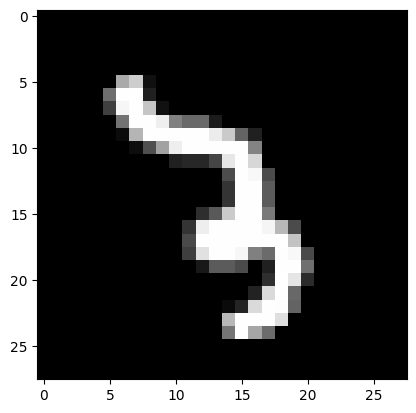

In [ ]:
index=3
print("Predicted " + str(y_validation[y_validation!=prediction_validation][index]) + " as " + 
     str(prediction_validation[y_validation!=prediction_validation][index]))
plt.imshow(x_validation[y_validation!=prediction_validation][index].reshape((28,28)),cmap='gray')

In [ ]:
x_test=test_file

In [ ]:
#predict test data
prediction_test = clf.predict(x_test)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sparse

# View predictions for Test data

Predicted 7


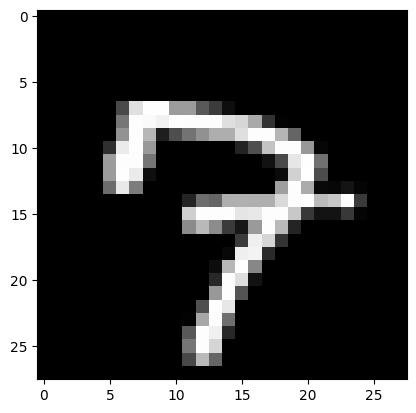

In [ ]:
index=5
print("Predicted " + str(prediction_test[index]))
plt.imshow(x_test.iloc[index].values.reshape((28,28)),cmap='gray')